In [6]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df_mall = pd.read_csv("/content/Mall_Customers.csv",index_col="CustomerID")
df_mall.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


Visualizing all 4 columns using seaborn

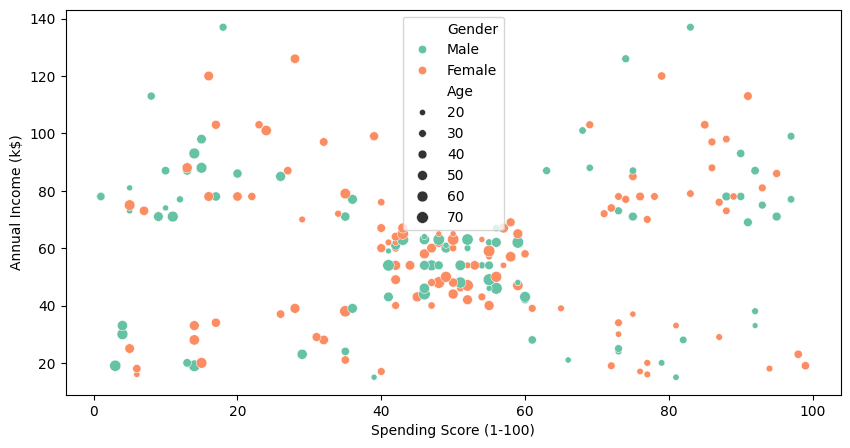

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (10 , 5) )
sns.scatterplot(
    data=df_mall,
    x="Spending Score (1-100)",
    y="Annual Income (k$)",
    hue="Gender",
    size="Age",
    palette="Set2"
);

Normalizing: It's crucial to normalize the data to eliminate any outliers or anomalies. Hence, dropping the “Gender” and “Age” columns and will be using the rest of them to find the clusters.

In [5]:
X = df_mall.drop(["Gender","Age"],axis=1)
X_norm = preprocessing.normalize(X)

ELBOW METHOD: Using elbow method to find optimal value of k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

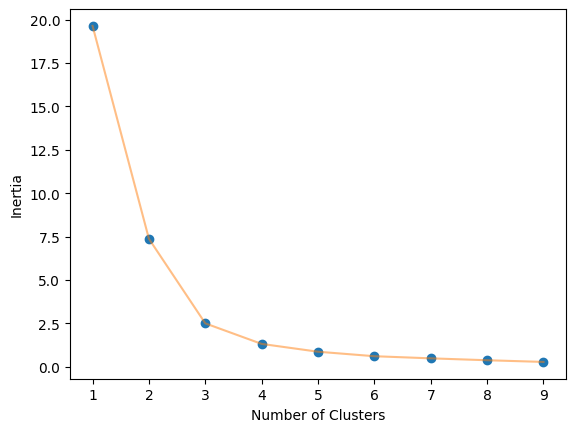

In [7]:
def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(X_norm,10)

After finding the optimal K value as 3, now applying it for k means clustering

In [8]:
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Using scatter plot to visualize it

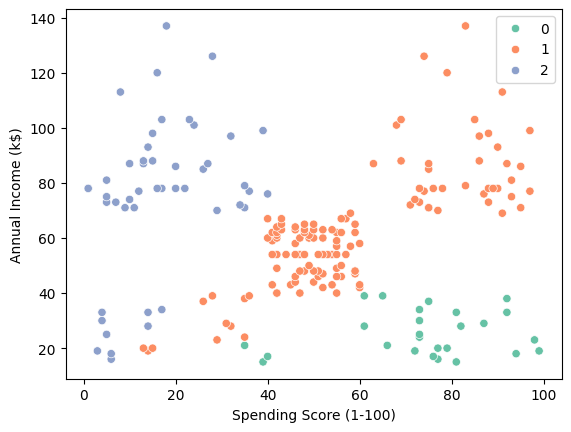

In [9]:
sns.scatterplot(data = X, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = labels, palette="Set2");

Using different features for clusters now ( Age and spending score )

In [10]:
X = df_mall.drop(["Gender","Annual Income (k$)"],axis=1)

X_norm = preprocessing.normalize(X)

Calculate the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

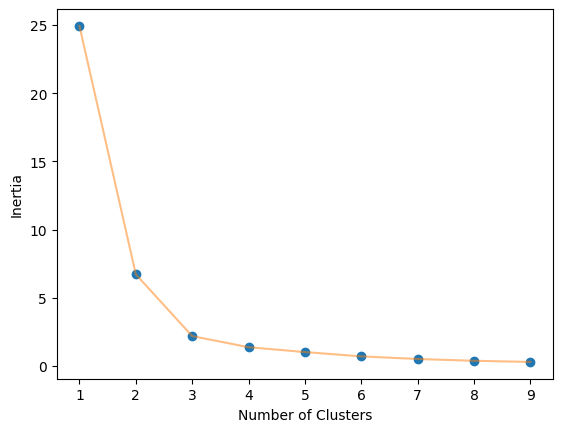

In [11]:
elbow_plot(X_norm,10)

In [12]:
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


“0”: Young High spender.
“1”: Medium spender from middle age to old ages.
“2”: Low spenders.

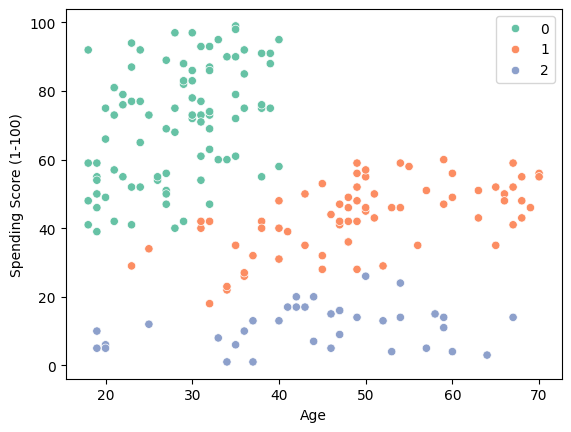

In [13]:
sns.scatterplot(data = X, x = 'Age', y = 'Spending Score (1-100)', hue = labels, palette="Set2");

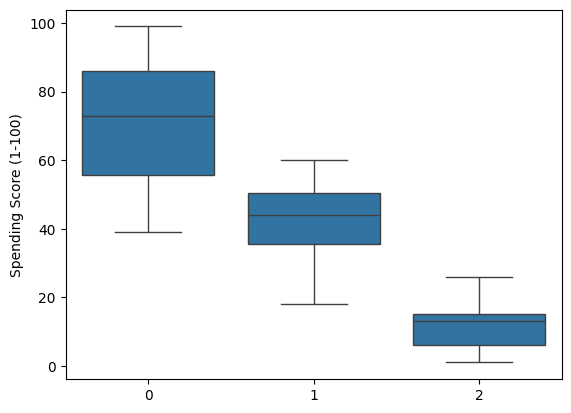

In [14]:
sns.boxplot(x = labels, y = X['Spending Score (1-100)']);